# 实验三：参数估计 & 非参数估计
- 姓名：吴静
- 学号：2113285
- 班级：信息安全二班


## 实验要求

### 基本要求
生成两个各包含 N=1000 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2\pmb{I}$ ，其中$\pmb{I}$是 $2*2$的单位矩阵。在生成数据集合 $X_1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X_2$ 时，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.3$, $p(w_3)=0.1$


<img src="https://i.loli.net/2021/03/31/7WT8naYPQc9N56x.png" alt="image.png" style="zoom: 40%;" /> 
<img src="https://i.loli.net/2021/03/31/qsetFODzM7IhYaN.png" alt="image.png" style="zoom:40%;" />

在两个数据集合上分别应用“似然率测试规则” 和“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。


### 中级要求
在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 
1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果

### 高级要求
在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计结果

### 导入需要的包

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math 

### 生成数据集合

首先，我们将使用multivariate_normal函数，函数原型如下：

```c
np.random.multivariate_normal(
    mean, 
    cov, 
    size=None, 
    check_valid=None, 
    tol=None)
```

该函数根据均值和协方差矩阵的情况生成一个多元正态分布矩阵，参数意义如下：

- mean：多维分布的均值
- cov：协方差矩阵
- size：生成的正态分布矩阵的维度（数量）
- check_valid：决定当cov即协方差矩阵不是半正定矩阵时程序的处理方式

In [3]:
Num=1000
p1=[0.3,0.3,0.3]
p2=[0.6,0.3,0.1]

cov = 2*np.identity(2)
#np.identity(2) 创建一个2x2的单位矩阵
    
mean=[]
mean1=[1,4]
mean.append(mean1)
mean2=[4,1]
mean.append(mean2)
mean3=[8,4]
mean.append(mean3)

size1=[0,333,333,334]
size2=[0,600,300,100]

In [4]:
def get_xy(x_data,Num):
    x=[]
    y=[]
    
    for i in range(Num):
        x.append(x_data[i][0])
        y.append(x_data[i][1])
    
    return x,y

In [5]:
def get_x_data(size1,size2,size3):
    
    x1 = np.random.multivariate_normal(mean[0], cov,size1)
    x2 = np.random.multivariate_normal(mean[1], cov,size2)
    x3 = np.random.multivariate_normal(mean[2], cov,size3)
    
    x1_x,x1_y=get_xy(x1,size1)
    x2_x,x2_y=get_xy(x2,size2)
    x3_x,x3_y=get_xy(x3,size3)

    # 绘制散点图
    plt.scatter(x1_x, x1_y, label='[1,4]', color='blue',s=5, marker='o')
    plt.scatter(x2_x, x2_y, label='[4,1]', color='orange',s=5, marker='o')
    plt.scatter(x3_x, x3_y, label='[8,4]', color='green', s=5, marker='o')

    # 显示图例
    plt.legend()

    # 显示散点图
    plt.show()
    
    #存储获得的数据
    ls=[]
    tag=[]
    for i in range(size1):
        ls.append(x1[i])
        tag.append(0)
    for i in range(size2):
        ls.append(x2[i])
        tag.append(1)
    for i in range(size3):
        ls.append(x3[i])
        tag.append(2)

    return ls,tag

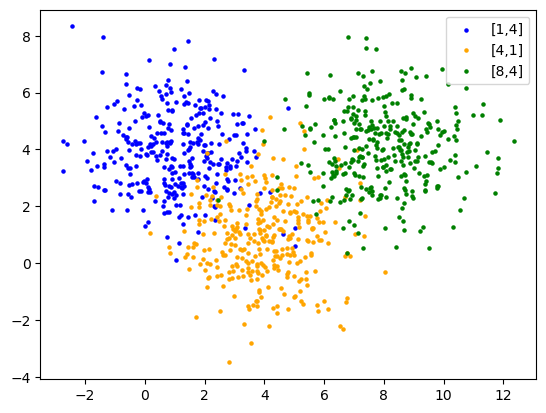

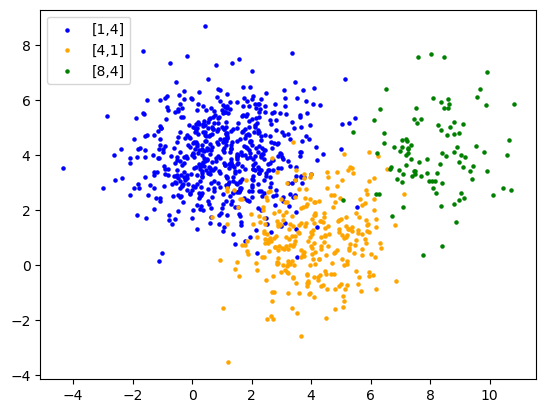

In [6]:
X1=[]
X2=[]
tag1=[]
tag2=[]

X1,tag1=get_x_data(size1[1],size1[2],size1[3])
X2,tag2=get_x_data(size2[1],size2[2],size2[3])

### 似然率测试

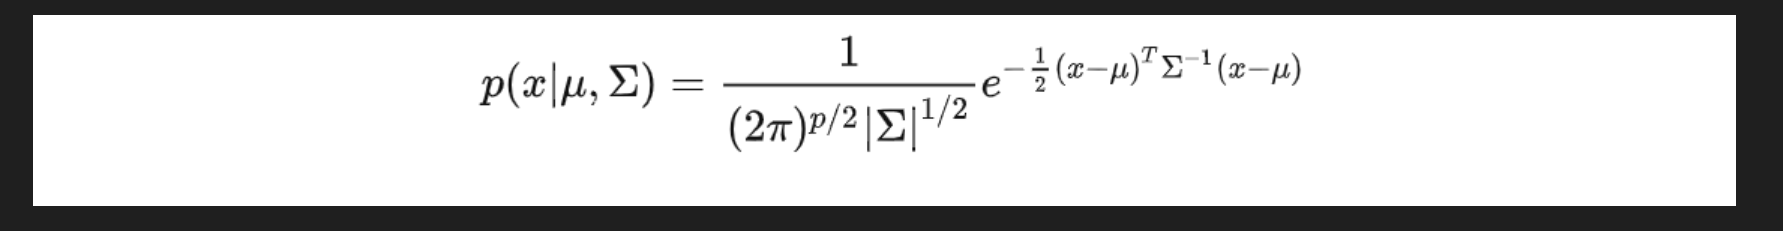

相关变量值如下：

- d是指的数据的维数，这里是2
- Σ是指的协方差矩阵，这里是cov
- μ是指的均值向量，这里是mean

In [7]:
def gauss(x_data_i,mean):
    #计算x中某个数据属于类别mean的概率
    
    det_cov=np.linalg.det(cov)
    # 计算矩阵的行列式
    
    inv_cov=np.linalg.inv(cov)
    #计算矩阵的逆矩阵
    
    result=1/(2*np.pi*np.sqrt(det_cov))*np.exp(-0.5*np.dot(np.dot((x_data_i-mean),inv_cov),(x_data_i-mean)))
    #根据公式计算p(x|w)
    
    return result

看回最大似然估计MLE：

* 给定随机样本 $\mathbf{X}=\left\{ \mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_N \right\} =\left\{ \mathbf{x}_k \right\} _{k=1}^{N}$来自概率密度 $p\left( \mathbf{x}\mid \theta \right)$ 
* 假设样本是独立同分布的,则它们的联合概率分布为 $p\left( \mathbf{X}\mid \theta \right) =p\left( \mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_N\mid \theta \right) =\prod_{k=1}^N{p}\left( \mathbf{x}_k\mid \theta \right)$
* 估计使似然函数取最大值的参数 $\hat{\theta}:\hat{\theta}=\underset{\theta}{\text{arg}\max}\prod_{k=1}^N{p}\left( \mathbf{x}_k\mid \theta \right)$ 
* 令似然函数对$\theta$的偏导数为零,求解 $\hat{\theta}:\frac{\partial}{\partial \theta}\log \prod_{k=1}^N{p}\left( \mathbf{x}_k\mid \theta \right) =0$
* 定义对数似然函数：  $L(\theta)=\log \prod_{k=1}^{N} p\left(\mathbf{x}_{k} \mid \theta\right) $
* 令似然函数对  $\theta$  的偏导数为零: 
$$
\begin{array}{l}
0&=\frac{\partial}{\partial \theta} L(\theta) \\
&=\frac{\partial}{\partial \theta} \log \prod_{k=1}^{N} p\left(\mathbf{x}_{k} \mid \theta\right) \\
&=\sum_{k=1}^{N} \frac{\partial}{\partial \theta} \log p\left(\mathbf{x}_{k} \mid \theta\right) \\
&=\sum_{k=1}^{N} \frac{1}{p\left(\mathbf{x}_{k} \mid \theta\right)} \frac{\partial}{\partial \theta} p\left(\mathbf{x}_{k} \mid \theta\right)
\end{array}
$$
* 求得  $\hat{\theta}$ , 对于样本点进行预测  $y=p(x \mid \hat{\theta})$ 

### 求使似然函数取得最大值的参数并计算正确率（错误率）：

In [8]:
# 似然率测试规则
def MLE_get_error(X,tag):
    #X是x1或者x2
    #mean是每一个类别的均值
    #cov是矩阵
    #p是每一个类别对应的概率（是个数组）
    
    error_num = 0
    #错误个数
    
    for i in range(Num):
        #对样本中每一个值进行预测，然后看预测结果和实际结果是否一致
        
        xi_j = np.zeros(3)
        #存储每个类别的似然率
        
        for j in range(3):
        # 计算样本i决策到每一个类别的概率，然后找到一个最有可能的类别
            
            xi_j[j] = gauss(X[i], mean[j])  
            #调用gauss函数来计算样本 X[i] 属于类别 j 的似然率
            
        xi_class = np.argmax(xi_j)
        # 找到具有最高似然率的类别索引
        # 即预测的xi的类别
        
        if xi_class != tag[i]:
            #比较似然率最高的类别 xi_class 与样本的实际类别是否相等
            #如果不相等，说明分类错误
            error_num += 1
            
    return error_num / Num

In [9]:
MLE1=MLE_get_error(X1,tag1)
MLE2=MLE_get_error(X2,tag2)

In [10]:
print("数据集：X1，MLE1：",MLE1)
print("数据集：X2，MLE2：",MLE2)

数据集：X1，MLE1： 0.077
数据集：X2，MLE2： 0.08


### 最大后验概率

最大后验概率规则的数学表达如下：

$$
\text{MAP}(\theta) = \arg\max_\theta P(\theta | X) = \arg\max_\theta \frac{P(X | \theta) \cdot P(\theta)}{P(X)}
$$

其中：

- $\theta$ 表示要估计的参数。
- $X$ 表示观测到的数据。
- P($\theta$ | $X$) 是后验概率，表示在观测数据 $X$ 的条件下参数 $\theta$ 的概率分布。
- P($X$ | $\theta$) 是似然函数，表示在给定参数 $\theta$ 的情况下观测数据 $X$ 的概率分布。
- P($\theta$) 是先验概率，表示在观测数据之前对参数 $\theta$ 的概率分布。
- P($X$) 是边缘似然函数，表示观测数据 $X$ 的概率。

In [11]:
# 最大后验概率测试规则
def MAP_get_error(X,tag,p):
    #X是x1或者x2
    #mean是每一个类别的均值
    #cov是矩阵
    #p是每一个类别对应的概率（是个数组）
    
    error_num = 0
    #错误个数
    
    for i in range(Num):
        #对样本中每一个值进行预测，然后看预测结果和实际结果是否一致
        
        xi_j = np.zeros(3)
        #存储每个类别的似然率
        
        for j in range(3):
        # 计算样本i决策到每一个类别的概率，然后找到一个最有可能的类别
            
            xi_j[j] = gauss(X[i], mean[j])*p[j]
            #调用gauss函数来计算样本 X[i] 再乘以对应概率属于类别 j 的对应的概率
            
        xi_class = np.argmax(xi_j)
        # 找到具有最高似然率的类别索引
        # 即预测的xi的类别
        
        if xi_class != tag[i]:
            #比较似然率最高的类别 xi_class 与样本的实际类别是否相等
            #如果不相等，说明分类错误
            error_num += 1
            
    return error_num / Num

In [12]:
MAP1=MAP_get_error(X1,tag1,p1)
MAP2=MAP_get_error(X2,tag2,p2)

In [13]:
print("数据集：X1，MAP1：",MAP1)
print("数据集：X2，MAP2：",MAP2)

数据集：X1，MAP1： 0.077
数据集：X2，MAP2： 0.063


### 核函数密度估计

<img src="https://s2.loli.net/2022/10/20/AHkVMFi3v8LpYqb.png"  style="zoom:50%"/>
<img src="https://s2.loli.net/2022/10/20/9sBWiDISdHjNaC2.png"  style="zoom:50%"/>
<img src="https://s2.loli.net/2022/10/20/9hAui8l6KYycsLH.png"  style="zoom:50%"/>

首先写出求p(x)的函数：

In [7]:
def get_PDE_p(xi,X_class,h):
    n=len(X_class)
    result=0.0
    
    for i in range(n):
        result+=np.exp(-(np.sqrt((xi[0]-X_class[i][0])**2+(xi[1]-X_class[i][1])**2))/(2*h*h))/(n*np.sqrt(2*np.pi*h*h))
        #||x-xn||^2表示欧几里得平方，即两者之间的距离
        #这里表示每一个元素xi和某一类别下所有其他元素的距离和
    
    return result

In [16]:
# 核函数密度估计（似然函数版）
def RBF_MLE_get_error(X,tag,h,size):
    #X是x1或者x2
    #mean是每一个类别的均值
    #cov是矩阵
    #p是每一个类别对应的概率（是个数组）

    X_class1=X[size[0]:size[1]]
    X_class2=X[size[1]:size[1]+size[2]]
    X_class3=X[size[1]+size[2]:size[1]+size[2]+size[3]]
    
    error_num = 0
    #错误个数
    
    for i in range(Num):
        #对样本中每一个值进行预测，然后看预测结果和实际结果是否一致
        
        xi_j = np.zeros(3)
        #存储每个类别的似然率
        
        xi_j[0] = get_PDE_p(X[i],X_class1,h)
        xi_j[1]=get_PDE_p(X[i],X_class2,h)
        xi_j[2]=get_PDE_p(X[i],X_class3,h)
        # 计算样本i决策到每一个类别的概率，然后找到一个最有可能的类别
            
        xi_class = np.argmax(xi_j)
        # 找到具有最高似然率的类别索引
        # 即预测的xi的类别
        
        if xi_class != tag[i]:
            #比较似然率最高的类别 xi_class 与样本的实际类别是否相等
            #如果不相等，说明分类错误
            error_num += 1

    return error_num /Num

In [11]:
h=[0.1,0.5,1,1.5,2]

In [19]:
X1_RBF_MLE=np.zeros(5)
X2_RBF_MLE=np.zeros(5)

for i in range(5):
    X1_RBF_MLE[i]=RBF_MLE_get_error(X1,tag1,h[i],size1)
    X2_RBF_MLE[i]=RBF_MLE_get_error(X2,tag2,h[i],size2)

In [20]:
for i in range(5):
    print("h=",h[i],"下，数据集1的MLE错误率：",X1_RBF_MLE[i])
print()
for i in range(5):
    print("h=",h[i],"下，数据集2的MLE错误率：",X2_RBF_MLE[i])

h= 0.1 下，数据集1的MLE错误率： 0.0
h= 0.5 下，数据集1的MLE错误率： 0.069
h= 1 下，数据集1的MLE错误率： 0.078
h= 1.5 下，数据集1的MLE错误率： 0.078
h= 2 下，数据集1的MLE错误率： 0.078

h= 0.1 下，数据集2的MLE错误率： 0.0
h= 0.5 下，数据集2的MLE错误率： 0.071
h= 1 下，数据集2的MLE错误率： 0.075
h= 1.5 下，数据集2的MLE错误率： 0.076
h= 2 下，数据集2的MLE错误率： 0.076


综合考虑过拟合和欠拟合的情况，最优h值大概为1。

In [12]:
# 核函数密度估计（最大后验概率版）
def RBF_MAP_get_error(X,tag,h,size,p):
    #X是x1或者x2
    #mean是每一个类别的均值
    #cov是矩阵
    #p是每一个类别对应的概率（是个数组）

    X_class1=X[size[0]:size[1]]
    X_class2=X[size[1]:size[1]+size[2]]
    X_class3=X[size[1]+size[2]:size[1]+size[2]+size[3]]
    
    error_num = 0
    #错误个数
    
    for i in range(Num):
        #对样本中每一个值进行预测，然后看预测结果和实际结果是否一致
        
        xi_j = np.zeros(3)
        #存储每个类别的似然率
        
        xi_j[0] = get_PDE_p(X[i],X_class1,h)*p[0]
        xi_j[1]=get_PDE_p(X[i],X_class2,h)*p[1]
        xi_j[2]=get_PDE_p(X[i],X_class3,h)*p[2]
        # 计算样本i决策到每一个类别的概率，然后找到一个最有可能的类别
            
        xi_class = np.argmax(xi_j)
        # 找到具有最高似然率的类别索引
        # 即预测的xi的类别
        
        if xi_class != tag[i]:
            #比较似然率最高的类别 xi_class 与样本的实际类别是否相等
            #如果不相等，说明分类错误
            error_num += 1

    return error_num /Num

In [13]:
X1_RBF_MAP=np.zeros(5)
X2_RBF_MAP=np.zeros(5)

for i in range(5):
    X1_RBF_MAP[i]=RBF_MAP_get_error(X1,tag1,h[i],size1,p1)
    X2_RBF_MAP[i]=RBF_MAP_get_error(X2,tag2,h[i],size2,p2)

In [14]:
for i in range(5):
    print("h=",h[i],"下，数据集1的最大后验概率错误率：",X1_RBF_MAP[i])
print()
for i in range(5):
    print("h=",h[i],"下，数据集2的最大后验概率错误率：",X1_RBF_MAP[i])

h= 0.1 下，数据集1的最大后验概率错误率： 0.0
h= 0.5 下，数据集1的最大后验概率错误率： 0.059
h= 1 下，数据集1的最大后验概率错误率： 0.061
h= 1.5 下，数据集1的最大后验概率错误率： 0.064
h= 2 下，数据集1的最大后验概率错误率： 0.063

h= 0.1 下，数据集2的最大后验概率错误率： 0.0
h= 0.5 下，数据集2的最大后验概率错误率： 0.059
h= 1 下，数据集2的最大后验概率错误率： 0.061
h= 1.5 下，数据集2的最大后验概率错误率： 0.064
h= 2 下，数据集2的最大后验概率错误率： 0.063


### k-近邻概率密度估计

<img src="https://s2.loli.net/2022/10/20/ViDtvjmzINwThHF.png" style="zoom:50%"/>
<img src="https://s2.loli.net/2023/11/01/Ji28YG5ZjXvgInS.png" style="zoom:40%"/>

In [24]:
def dis(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
#计算两点间距离

In [25]:
def Knn(X, k ,tag):
    num = len(X)
    #计算输入数据集中的数据点数目
    
    # 前两个维度（200x200）对应于网格点，第三个维度对应于类别标签
    p = np.zeros((200, 200,3))
    
    # 在[-5,15]的范围内，以0.1为步长估计概率密度
    for i in np.arange(0, 200):
        for j in np.arange(0, 200):
            #步骤：
            # 生成标准差距离
            # 根据第k个数据点的位置计算V
            # 找到前k个数据点的类别,分别加到对应类的权重上
            # 计算每个采样点的概率密度函数
            
            # 1.生成标准差距离
            distances = []
            for index in range(num):
                distances.append( dis( X[index][0], X[index][1], -5+0.1*i , -5+0.1*j ) )
                #X[index][0]是数据集中的点的横坐标
                #X[index][1]是数据集中的点的纵坐标
                #-5是范围的起始点
                #0.1是步长
                #范围的终点是i/j等于200时，-5+0.1i/j为15

            sorted_indexs=np.argsort(distances)
            
            # 2.根据第k个数据点的位置计算V，因为第k个数据点距离最远
            V = np.pi * ( distances[sorted_indexs[k-1]] )**2
            #以当前网格点为中心，半径等于到第k个最近邻的距离的圆的面积。
            #这表示用于核密度估计的“窗口”。
            
            # 3.找到前k个数据点的类别,分别加到对应类的权重上
            for q in range(k):
                c = tag[sorted_indexs[q]]
                # 判断第q个数据点的类别
                
                #4.计算每个采样点的概率密度函数 
                p[i][j][int(c)-1] = p[i][j][int(c)-1] + 1/(num*V);
                #权重是 1 / (num * V)
                #int(c)-1表示索引
    return p

In [26]:
def draw(p_knn,sample,k):
    #创建一个二维网格 X 和 Y，用于表示 x 和 y 坐标的范围。
    #这个网格在 x 和 y 方向上都从 -5 到 15，总共包含 200x200 个点
    X,Y = np.mgrid[-5:15:200j, -5:15:200j]
    
    #提取所有不同类别（标签）的概率密度估计结果。
    #Z0 表示类别 0，Z1 表示类别 1，Z2 表示类别 2
    Z=[]
    Z0 = p_knn[:, :, 0]
    Z.append(Z0)
    Z1 = p_knn[:, :, 1]
    Z.append(Z1)
    Z2 = p_knn[:, :, 2]
    Z.append(Z2)
    
    #创建一个绘图窗口 fig，包含三个子图
    fig = plt.figure(figsize=(15,5))

    #创建一个子图，指定子图在 fig 中的位置为第 1 个位置，并将其类型设置为 3D 投影
    for i in range(3):
        ax=plt.subplot(1,3,i+1,projection='3d')
        ax.plot_surface(X, Y, Z[i],cmap=plt.cm.coolwarm)
        title="sample:"+sample+", k="+str(k)+", label:"+str(i)
        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
    

In [28]:
k=[1,3,5]

p1_knn=[]
p2_knn=[]

for i in range(3):
    # 获得概率密度估计
    p1_knn.append(Knn(X1, k[i],tag1))
    p2_knn.append(Knn(X2,k[i],tag2))

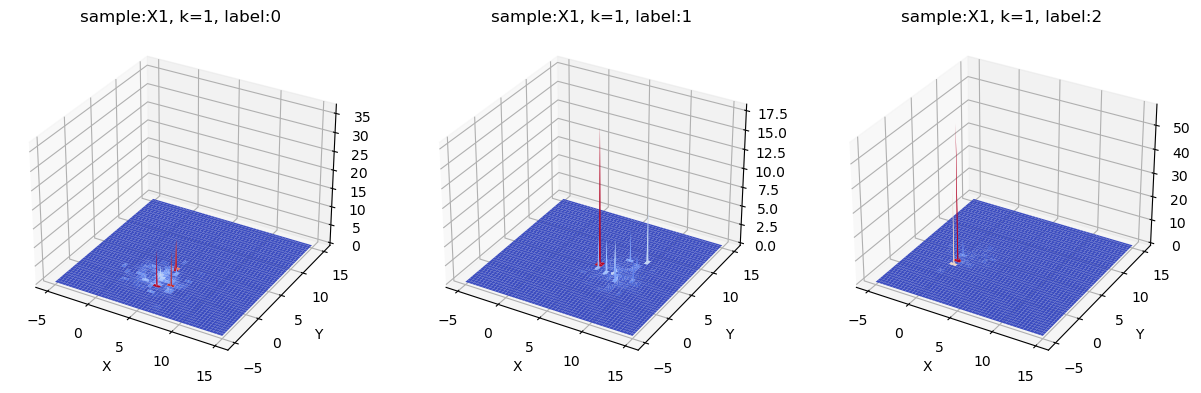

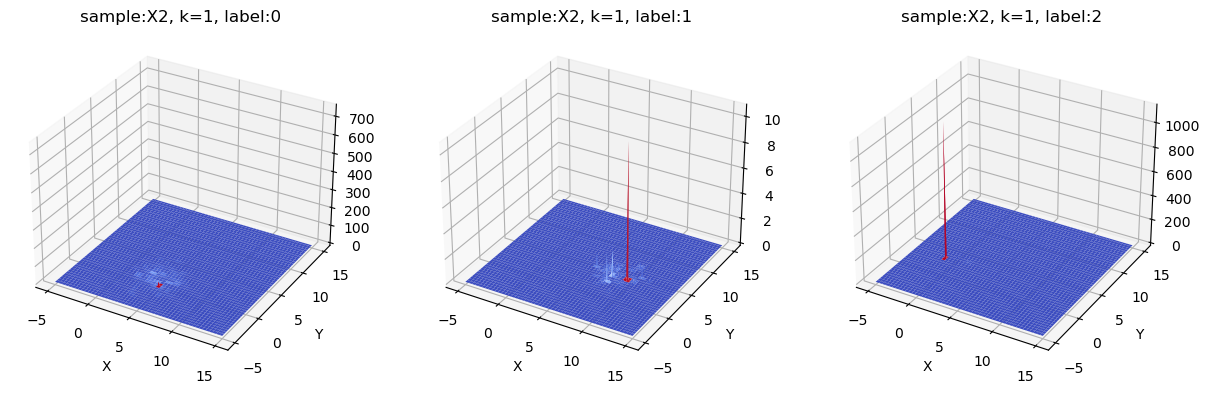

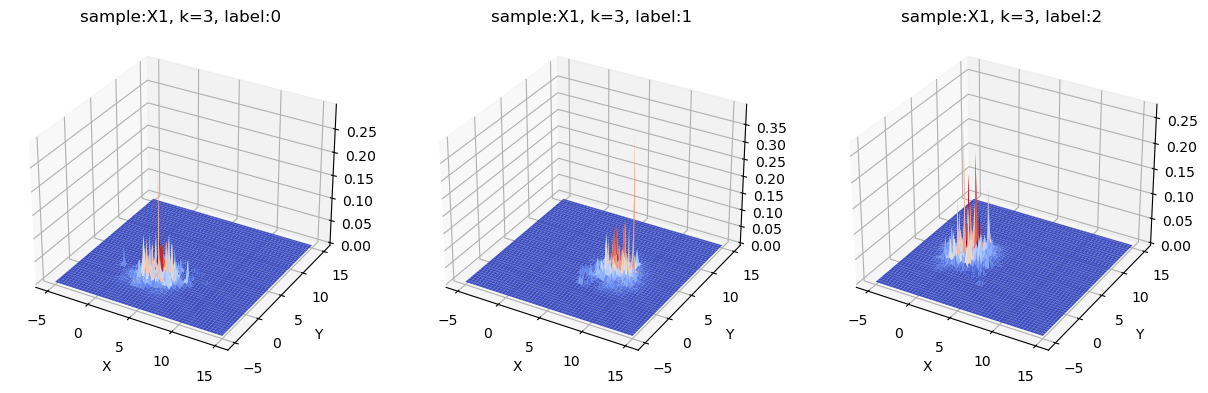

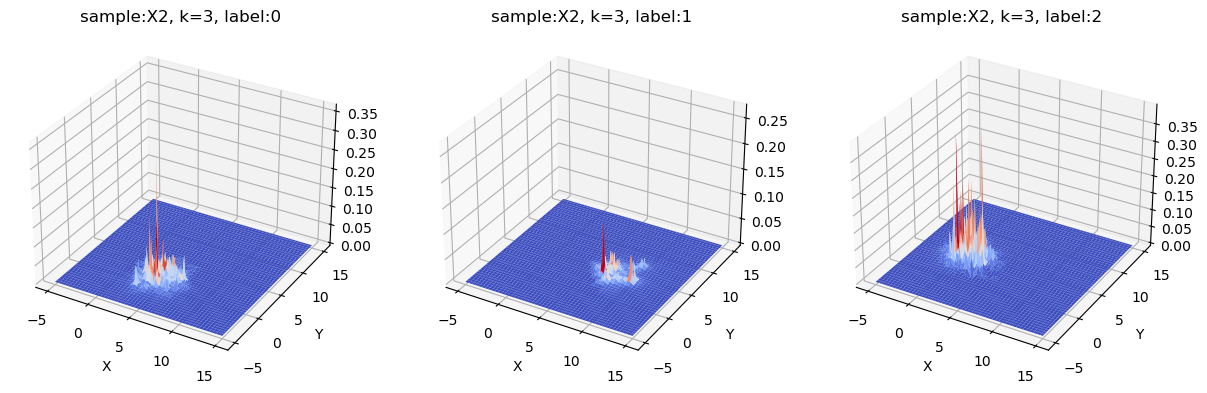

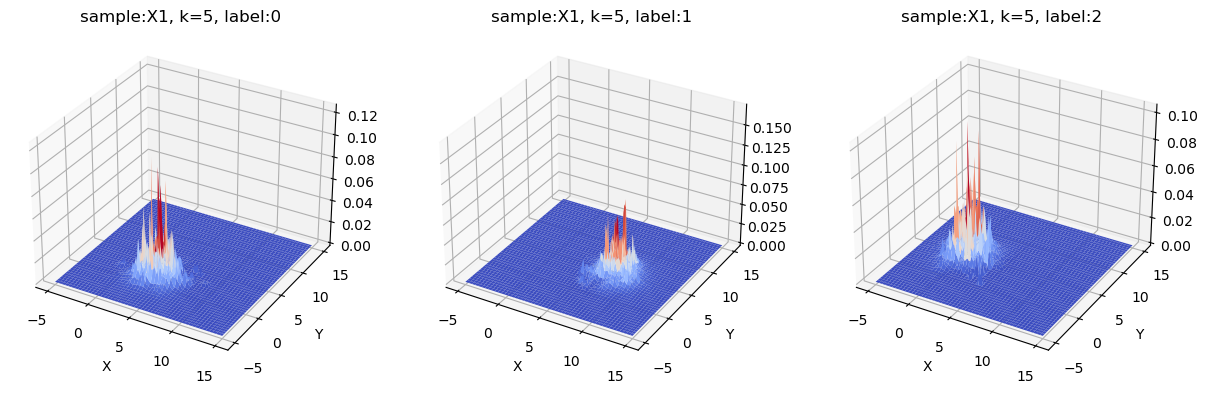

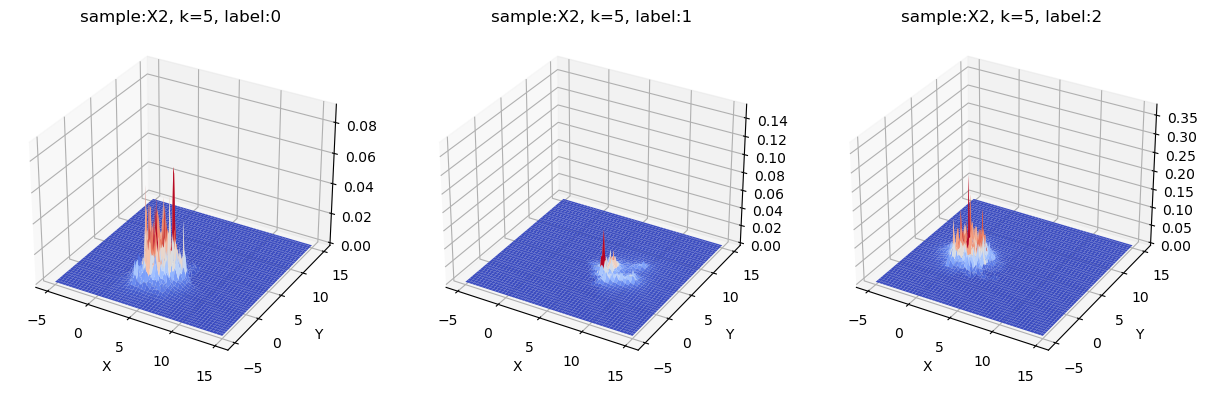

In [29]:
for i in range(3):
    draw(p1_knn[i],"X1",k[i])
    draw(p2_knn[i],"X2",k[i])

以上便为不同数据集，不同k值下knn近邻概率密度估计的结果。